<a href="https://colab.research.google.com/github/cybermin/2022_BSSM/blob/main/05_codelab2_urllib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

# **해결문제**


공공데이터 포털 사이트에서 한국환경공단_에어코리아_미세먼지 경보 발령 현황 자료를 수집하여 분석하시오.


---

In [ ]:
#한글 폰트 사용설치
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

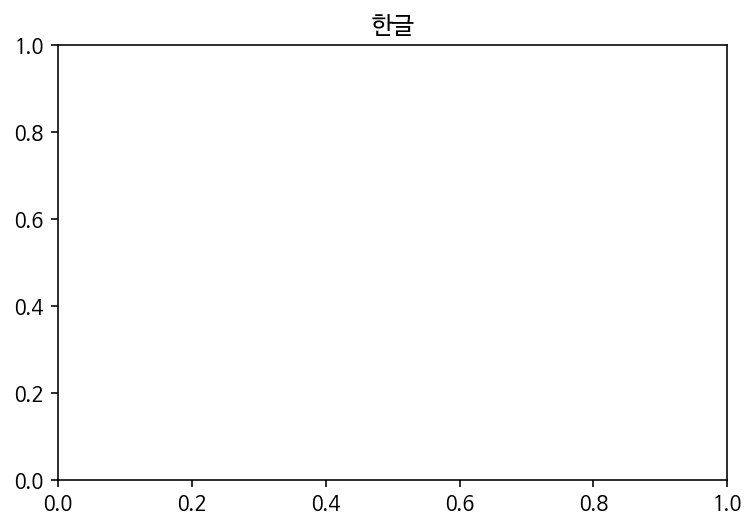

In [ ]:
plt.title('한글')
plt.show()

#urllib 모듈
+ URL과 웹 요청에 관련된 모듈들 패키지로 묶어 제공

## urllib.request 모듈
* 웹 페이지 요청 및 데이터를 가져올 수 있음

### urllib.request.urlopen(url, data)
* 웹 서버에 정보를 요청한 후, 돌려받은 응답을 저장하여 ‘**응답 객체(HTTPResponse)**’를 반환
* data는 서버로 전송할 추가 데이터를 지정하는 객체
* 반환된 응답 객체:  read() 메서드를 실행
   - 웹 서버가 응답한 데이터를 바이트 배열로 읽어들임
   - 읽어들인 바이트 배열 : 이진수로 이루어진 수열이어서 **텍스트 형식의 데이터를 decode('utf-8') 메서드를 실행하여 문자열로 변환**

* 참고) **Byte 데이터**
  + 1바이트(0~255사이 코드)로 표현되는 문자 표현
  + 문자열에서 사용하는 연산을 거의 제공
    - 인덱싱/슬라이싱, in, Upper(), Split()
  + 지원 메소드
    - **decode(인코딩값)** : 바이트->문자열로 변환  
    - **encode()** : 문자열->바이트로 변환  


### urllib.request.Request(url, headers={})
* POST방식으로 데이터를 보내려고 할 경우 
  + URL : 요청 주소
  * headers : 딕셔너리형태의 헤더

In [ ]:
from urllib.request import Request, urlopen
import json  

+ 공공데이터 포털 : https://www.data.go.kr/

In [ ]:
#접속 URL 생성
apiKey = "8qw7g%2FC%2BMGd2iRqEvb%2FEx0Sg3ZwAAsnS%2FQ7rRaU3l4UUYfNWgyAbYpNw541yy9pueEvoCcNwmCww8ss32BBWEA%3D%3D"
url = "http://apis.data.go.kr/B552584/UlfptcaAlarmInqireSvc/getUlfptcaAlarmInfo?year=2020&pageNo=1&numOfRows=500&returnType=json&serviceKey="
url = url + apiKey
 

In [ ]:
#요청
response = urlopen(url)

In [ ]:
response 

In [ ]:
response.read()

b'{"response":{"body":{"totalCount":304,"items":[{"clearVal":"33","sn":"322","districtName":"\xec\x84\xb8\xec\xa2\x85","dataDate":"2020-12-29","issueVal":"80","issueTime":"12:00","clearDate":"2020-12-29","issueDate":"2020-12-29","moveName":"\xec\x84\xb8\xec\xa2\x85\xea\xb6\x8c\xec\x97\xad","clearTime":"19:00","issueGbn":"\xec\xa3\xbc\xec\x9d\x98\xeb\xb3\xb4","itemCode":"PM25"},{"clearVal":"33","sn":"323","districtName":"\xec\xb6\xa9\xeb\xb6\x81","dataDate":"2020-12-29","issueVal":"77","issueTime":"13:00","clearDate":"2020-12-29","issueDate":"2020-12-29","moveName":"\xec\xa4\x91\xeb\xb6\x80\xea\xb6\x8c\xec\x97\xad","clearTime":"19:00","issueGbn":"\xec\xa3\xbc\xec\x9d\x98\xeb\xb3\xb4","itemCode":"PM25"},{"clearVal":"28","sn":"321","districtName":"\xec\xb6\xa9\xeb\x82\xa8","dataDate":"2020-12-28","issueVal":"76","issueTime":"21:00","clearDate":"2020-12-29","issueDate":"2020-12-28","moveName":"\xeb\xb6\x81\xeb\xb6\x80\xea\xb6\x8c\xec\x97\xad","clearTime":"22:00","issueGbn":"\xec\xa3\xbc\xe

In [ ]:
# 요청에 대한 응답처리
resp = response.read().decode('utf-8')
print(resp)
print(type(resp))

{"response":{"body":{"totalCount":304,"items":[{"clearVal":"33","sn":"322","districtName":"세종","dataDate":"2020-12-29","issueVal":"80","issueTime":"12:00","clearDate":"2020-12-29","issueDate":"2020-12-29","moveName":"세종권역","clearTime":"19:00","issueGbn":"주의보","itemCode":"PM25"},{"clearVal":"33","sn":"323","districtName":"충북","dataDate":"2020-12-29","issueVal":"77","issueTime":"13:00","clearDate":"2020-12-29","issueDate":"2020-12-29","moveName":"중부권역","clearTime":"19:00","issueGbn":"주의보","itemCode":"PM25"},{"clearVal":"28","sn":"321","districtName":"충남","dataDate":"2020-12-28","issueVal":"76","issueTime":"21:00","clearDate":"2020-12-29","issueDate":"2020-12-28","moveName":"북부권역","clearTime":"22:00","issueGbn":"주의보","itemCode":"PM25"},{"clearVal":"34","sn":"320","districtName":"대구","dataDate":"2020-12-28","issueVal":"83","issueTime":"14:00","clearDate":"2020-12-28","issueDate":"2020-12-28","moveName":"대구권역","clearTime":"16:00","issueGbn":"주의보","itemCode":"PM25"},{"clearVal":"26","sn":"31

In [ ]:
jsonResp = json.loads(resp) 
type(jsonResp)

dict

In [ ]:
items =  

In [ ]:
items[0]

{'clearDate': '2020-12-29',
 'clearTime': '19:00',
 'clearVal': '33',
 'dataDate': '2020-12-29',
 'districtName': '세종',
 'issueDate': '2020-12-29',
 'issueGbn': '주의보',
 'issueTime': '12:00',
 'issueVal': '80',
 'itemCode': 'PM25',
 'moveName': '세종권역',
 'sn': '322'}

# 파일(File)
## **파일 생성**
+ 파일 객체 = open(파일 이름, 파일 열기 모드, encoding='UTF-8’)
 - 한글이 포함된 파일 입력시 UnicodeDecodeError 에러가 발생하면 encoding 값을 'cp949' 사용

+ 파일 열기 모드
 - r	읽기모드 - 파일을 읽기만 할 때 사용
 - w	쓰기모드 - 파일에 내용을 쓸 때 사용
 - a	추가모드 - 파일의 마지막에 새로운 내용을 추가 시킬 때 사용


## **파일입력 메소드**
+ 파일객체.readline(): 파일의 첫 번째 줄을 읽어 출력하는 경우
+ 파일객체.readlines(): 파일의 모든 라인을 읽어서 각각의 줄을 요소로 갖는 리스트로 리턴
+ 파일객체.read(): 파일의 내용 전체를 문자열로 리턴


## **파일출력 메소드**
+ 파일객체.write()


## with…as 
+ **파일을 open한 후 with…as 구문이 끝나면 자동으로 close**
```
with open(파일 경로, 모드) as 파일 객체:
```

In [ ]:
import pandas as pd 

In [ ]:
#자료 불러오기 
df =  
df

,지역명,권역명,항목명,경보단계,발령일,발령시간,발령농도,해제일,해제시간,해제농도
0,세종,세종권역,PM25,주의보,2020-12-29,12:00,80,2020-12-29,19:00,33
1,충북,중부권역,PM25,주의보,2020-12-29,13:00,77,2020-12-29,19:00,33
2,충남,북부권역,PM25,주의보,2020-12-28,21:00,76,2020-12-29,22:00,28
3,대구,대구권역,PM25,주의보,2020-12-28,14:00,83,2020-12-28,16:00,34
4,대구,대구권역,PM25,주의보,2020-12-24,11:00,80,2020-12-24,15:00,26
...,...,...,...,...,...,...,...,...,...,...
299,충남,북부권역,PM25,주의보,2020-01-03,11:00,85,2020-01-05,15:00,31
300,전북,익산권역,PM25,주의보,2020-01-03,02:00,80,2020-01-05,15:00,19
301,전북,장수권역,PM25,주의보,2020-01-04,00:00,77,2020-01-04,14:00,29
302,충북,중부권역,PM25,주의보,2020-01-03,12:00,76,2020-01-05,16:00,33


In [ ]:
import seaborn as sns

In [ ]:
df['지역명'].value_counts().index

Index(['전북', '경기', '충남', '경남', '충북', '인천', '서울', '광주', '세종', '대구', '강원', '전남',
       '경북', '부산', '제주', '대전', '울산'],
      dtype='object')

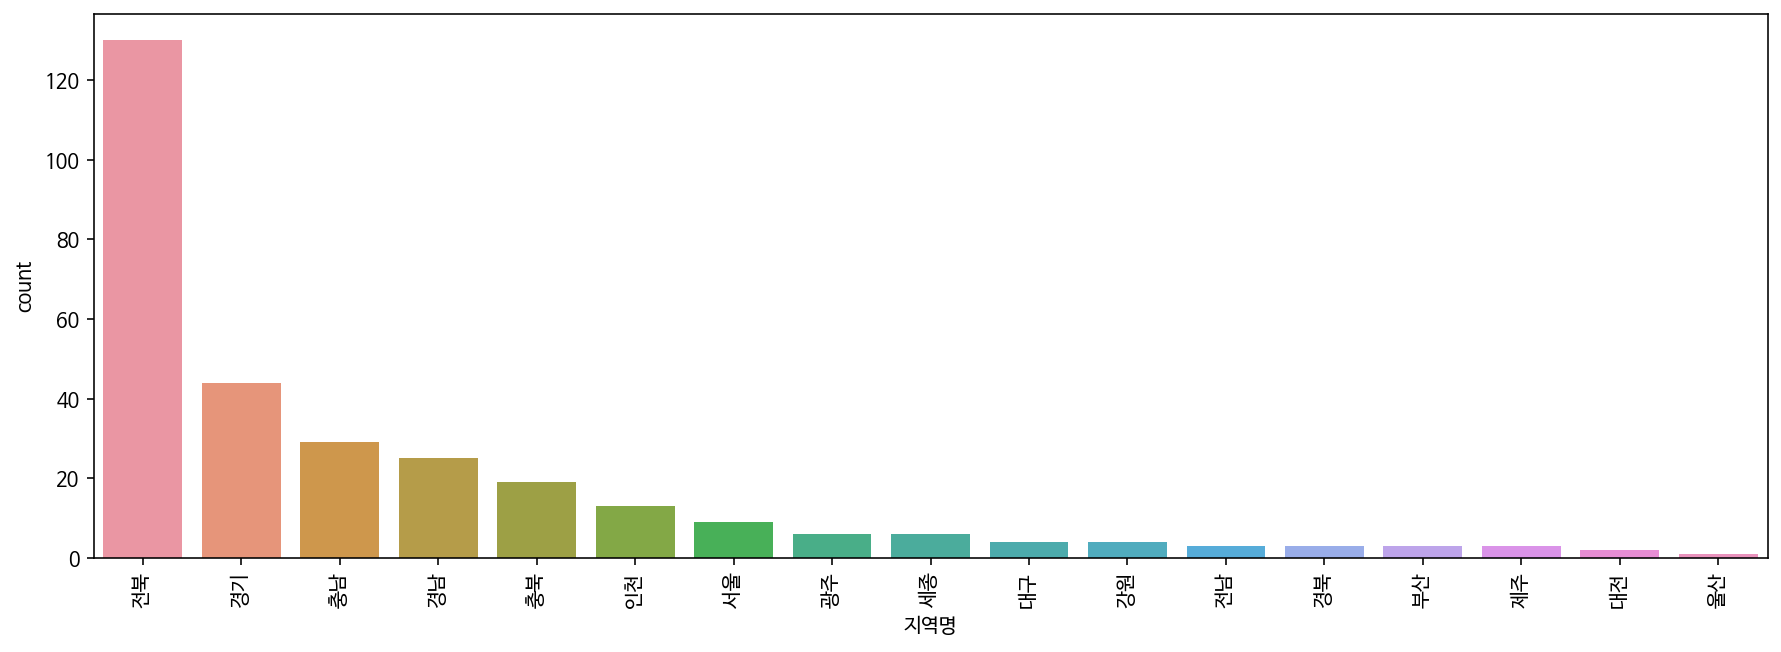

In [ ]:
plt.figure(figsize=(15,5))
 
plt.xticks(rotation=90)
plt.show()

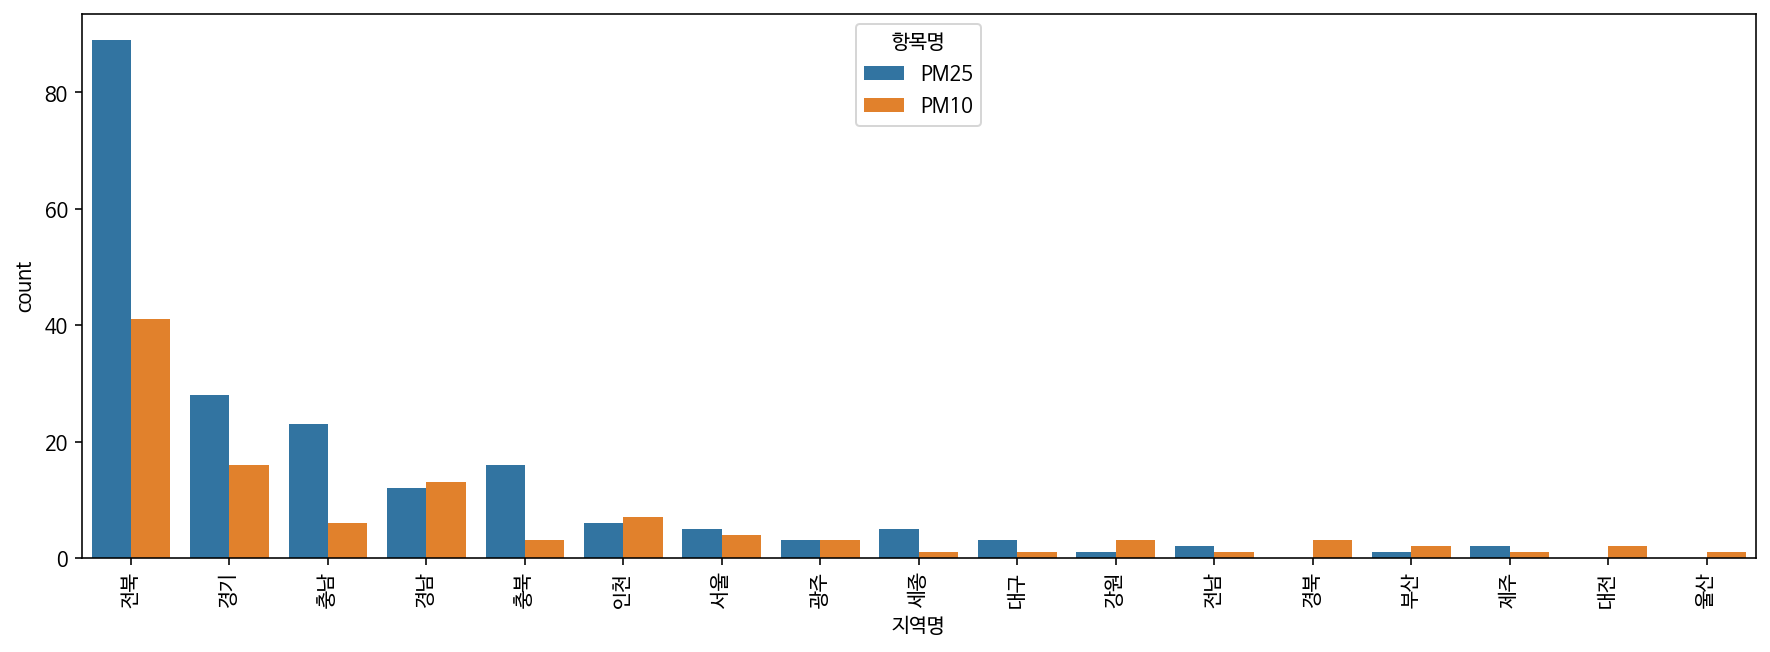

In [ ]:
plt.figure(figsize=(15,5))
 
plt.xticks(rotation=90)
plt.show()

In [ ]:
pm25 = df[df['항목명']=='PM25']

In [ ]:
pm25

,지역명,권역명,항목명,경보단계,발령일,발령시간,발령농도,해제일,해제시간,해제농도
0,세종,세종권역,PM25,주의보,2020-12-29,12:00,80,2020-12-29,19:00,33
1,충북,중부권역,PM25,주의보,2020-12-29,13:00,77,2020-12-29,19:00,33
2,충남,북부권역,PM25,주의보,2020-12-28,21:00,76,2020-12-29,22:00,28
3,대구,대구권역,PM25,주의보,2020-12-28,14:00,83,2020-12-28,16:00,34
4,대구,대구권역,PM25,주의보,2020-12-24,11:00,80,2020-12-24,15:00,26
...,...,...,...,...,...,...,...,...,...,...
299,충남,북부권역,PM25,주의보,2020-01-03,11:00,85,2020-01-05,15:00,31
300,전북,익산권역,PM25,주의보,2020-01-03,02:00,80,2020-01-05,15:00,19
301,전북,장수권역,PM25,주의보,2020-01-04,00:00,77,2020-01-04,14:00,29
302,충북,중부권역,PM25,주의보,2020-01-03,12:00,76,2020-01-05,16:00,33


In [ ]:
pm25['경보단계'].value_counts()

주의보    196
Name: 경보단계, dtype: int64

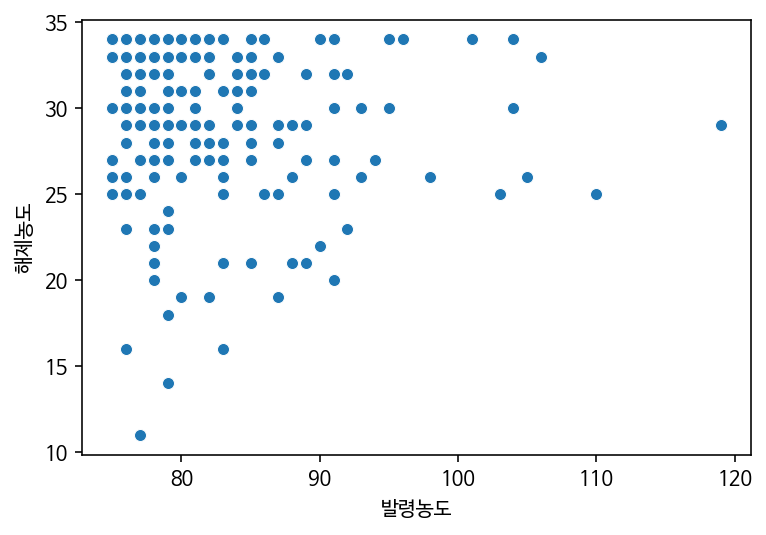

In [ ]:
 
plt.show()